# t-Test

- A t-test can be used to determine if there is a systematic difference between the means of two groups. 

- The simplest form of analysis that can be done is one with only one independent variable (outcome variable) that is manipulated in only two ways (group variable) and only one numeric outcome is measured. 

- The manipulation of the independent variable typically involves having an experimental condition and a control: 

  - E.g., does the introduction of a new UX feature on a website lead to a higher revenue than the old one? We then could measure revenue for both conditions and compare them. This situation can be analysed with a t-test.

- Furthermore, we can use a t-test to draw conclusions from model estimates. 
- In particular, the test can be used to decide whether there is any significant relationship between a dependent variable `y` and a feature `x` by testing the null hypothesis that the regression coefficient `b` equals 0.

Among the most frequently used t-tests are:

- **Dependent t-test**: Compares two means based on related data.
- **Independent t-test**: Compares two means based on independent data
- **Significance testing**: Testing the significance of the coefficient b in a regression.

## Independent t-test example

Let's conduct an independent two-sample t-test for the following hypothetical research question for an e commerce online shop: 

> Does the introduction of a new UX feature increases the time on site? 



We proceed as follows:

- Imagine that we split a random sample of 1000 website members into two groups using random assignment. Random assignment ensures that, on average, everything else is held constant between the two groups.

- Group “A” (500 members) receives the current product experience

- Group “B” (500 members) receives some change that we think is an improvement to the experience. 

- We then compare metrics (time on site) between the two groups. 


Let's formulate a **nullhypothesis ($H_0)$:**

- $H_0$ "There is no difference in the time spent on site between the two groups."


### Generate data

We generate our own data for this example.

In [7]:
import numpy as np
from scipy import stats

# number of participants
n_A = 500  # see old feature
n_B = 500 # see new feature

# generate random data with scipy
np.random.seed(123)

# mean =loc and standard deviation = scale
ux_new = stats.norm.rvs(loc=4.0, scale=1.2, size = n_B)
ux_old = stats.norm.rvs(loc=3.8, scale=1.5, size = n_A)

In [8]:
import pandas as pd

# create pandas DataFrame
df = pd.DataFrame({'ux_new': ux_new, 'ux_old': ux_old})
df.head(5)

,ux_new,ux_old
0,2.697243,4.928051
1,5.196815,3.904461
2,4.339574,3.401832
3,2.192446,5.194377
4,3.305680,5.691232


### Plot data

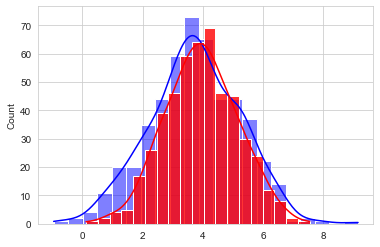

In [9]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

sns.histplot(x=ux_old, data=df, color="blue", label="UX old", kde=True)
sns.histplot(x=ux_new, data=df, color="red", label="UX new", kde=True, alpha=0.8);

### Perform test

Usually we would just use the independent t-test function below and are done:


In [ ]:
t, p = stats.ttest_ind(ux_new, ux_old)
print("t =", t)
print("p =", p)

## Detailed explanation

### Calculate t-statistic

The t-statistic is used in a t-test to determine whether to support or reject the null hypothesis. The formula of the statistic is:

$$t = \frac{\bar{x}_{1} - \bar{x}_{2}}{{s}_p \sqrt{\frac{2}{n}}}$$

where $s_p$ is the pooled standard deviation:

$$s_p = \sqrt{\frac{{s}^{2}_{X_1} + {s}^{2}_{X_2}} {2} }$$

Thus, the t statistic as a way of quantifying how large the difference between groups is in relation to the sampling variability of the difference between means.

Note that we perform the calculation of the t-Test manually to better understand the concept. 



First of all, let's calculate the different components of the formula. We will start with the numerator of the formula. 

#### Difference in mean

Calculate the differeence between the two means:

In [11]:
diff_mean = ux_new.mean() - ux_old.mean()
print(round(diff_mean,2))

0.21


#### Pooled standard deviation

We calculate the variance. 

$$s^{2} = \frac{\sum (x_{i} - \bar{x})^{2}}{N - 1}$$

and standard deviation: 

$$s  = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{N - 1}}$$


We use the numpy function `var` with the optional argument `ddof` which means “Delta Degrees of Freedom” (the divisor used in the calculation of the variance is (N - ddof), where `N` represents the number of elements. By default `ddof` is zero). 

Note that `ddof` is equal to the number of parameters we use. We estimate the mean, therefore we only have one parameter. See this [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) for more information.

In [12]:
import numpy as np

# calculate variance
var_ux_new = ux_new.var(ddof=1)
var_ux_old = ux_old.var(ddof=1)

print("Variance:")
print("UX new:", var_ux_new, "UX old:", var_ux_old)

# calculate standard deviation
s_ux_new = np.sqrt(var_ux_new)
s_ux_old = np.sqrt(var_ux_old)

print("Standard deviation:")
print("UX new:", s_ux_new, "UX old:", s_ux_old)

Variance:
UX new: 1.452143284234209 UX old: 2.247145174966161
Standard deviation:
UX new: 1.2050490795956026 UX old: 1.499048089610924


Now we calculate the pooled variance (also known as combined variance, composite variance, or overall variance) to estimate the combined variance of our two groups:

$$s_{p}^2 = \frac {(n_{1} - 1)s_{1}^2 + (n_{2} - 1)s_{2}^2}{n_{1} + n_{2} - 2}$$

Afterwards, we take the square root to get the pooled standard deviatin (${s}_p$)

In [13]:
# calculate pooled variance
var_p = ( (n_B - 1) * var_ux_new + (n_A - 1) * var_ux_old ) / ( n_A + n_B - 2 )
var_p

1.849644229600185

In [14]:
# pooled standard deviation  
s_p = np.sqrt(var_p)
s_p

1.3600162607852102

### Calculate t-statistic

$$t = \frac{\bar{x}_{1} - \bar{x}_{2}}{{s}_p \sqrt{\frac{2}{n}}}$$

In [15]:
# calculate t-statistic
t = (diff_mean) / (s_p * np.sqrt(2/500))
t

2.49205054533012

The probability density function for t is ([see documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) and [wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)):

In [16]:
## Compare with the critical t-value
df = n_A + n_B - 2 # Degrees of freedom
crit_t = stats.t.cdf(t, df=df)
print(crit_t)

0.9935689310636443


In [17]:
#p-value after comparison with the t 
p = 1 - crit_t
print(p)

0.006431068936355699


In [18]:
print('t =', t)
print('p=', 2*p) 

t = 2.49205054533012
p= 0.012862137872711399


- Note that we multiply the p value by 2 because it's a two tailed t-test.

- You can see that after comparing the t statistic with the critical t value (computed internally) we get a p value way below 5% and thus we reject the null hypothesis.

- This means we have an indication that the mean of the two distributions are different and statistically significant.